In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
xl = pd.ExcelFile('daily_almaty_18nov19(ext).xlsx')

xl.sheet_names

['sensors', 'data']

In [3]:
data = pd.read_excel('daily_almaty_18nov19(ext).xlsx', sheet_name='data')
data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,104,105,106,108,3269728,5917712,Grand Total
0,22-Mar,NaN,91.982979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,91.982979
1,23-Mar,NaN,84.649269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,84.649269
2,24-Mar,208.403433,43.675636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,126.039535
3,25-Mar,67.575610,58.792217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,63.183913
4,26-Mar,45.677083,48.348401,NaN,21.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,38.572597


In [0]:
data_total = data[['Row Labels','Grand Total']]

In [5]:
data_total

,Row Labels,Grand Total
0,22-Mar,91.982979
1,23-Mar,84.649269
2,24-Mar,126.039535
3,25-Mar,63.183913
4,26-Mar,38.572597
...,...,...
963,14-Nov,74.083985
964,15-Nov,53.683390
965,16-Nov,54.625668
966,17-Nov,121.993547


In [0]:
days = [r for r in range(data_total.shape[0])]

In [0]:
days;

In [0]:
sums = {}
sums['Grand Total'] = data_total['Grand Total']

In [0]:
sums;

In [0]:
from scipy.fftpack import fft
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Views per Page')
    plt.xlabel('Day')
    #plt.title(labels[key])
    plt.plot(days,sums[key])#,label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:])#,label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

In [0]:
import scipy

In [16]:
scipy.version.full_version

'1.4.1'

In [17]:
pd.__version__

'0.25.3'

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


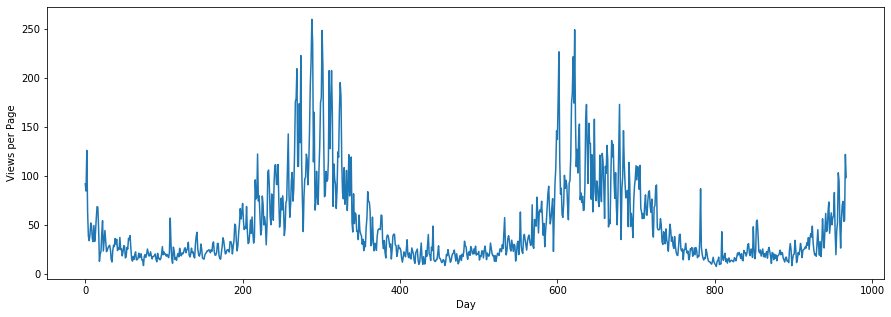

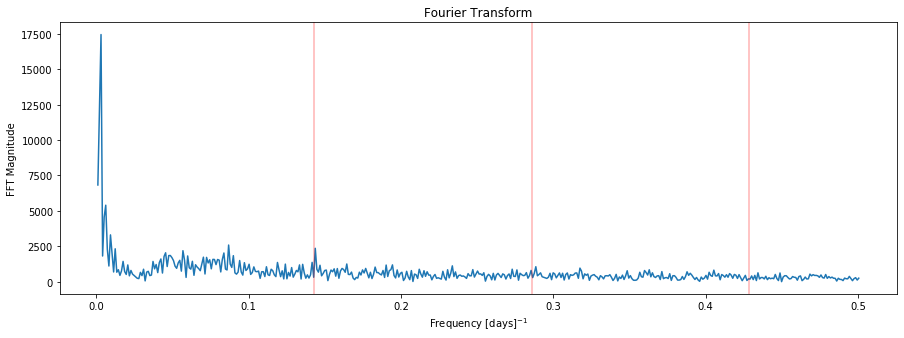

In [11]:
plot_with_fft('Grand Total')

In [0]:
data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,104,105,106,108,3269728,5917712,Grand Total
0,22-Mar,NaN,91.982979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,91.982979
1,23-Mar,NaN,84.649269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,84.649269
2,24-Mar,208.403433,43.675636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,126.039535
3,25-Mar,67.575610,58.792217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,63.183913
4,26-Mar,45.677083,48.348401,NaN,21.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3269728.0,5917712.0,38.572597


In [0]:
data.shape

(968, 28)

In [0]:
data_t = data.drop(data.columns[[0, 23, 25, 26, 27]], axis=1)

In [0]:
data_t.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,104,105,108
0,NaN,91.982979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,84.649269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data_t.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,104,105,108
0,NaN,91.982979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,84.649269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
sensors = pd.read_excel('daily_almaty_18nov19(ext).xlsx', sheet_name='sensors', header=None)
sensors.head(30)

,0,1,2,3,4,5
0,1,Сейфуллина - Дулатова,Алматы,Казахстан,43.313,76.939
1,2,Альфараби - Маркова,Алматы,Казахстан,43.224,76.938
2,3,Абая - Тлендиева,Алматы,Казахстан,43.240,76.874
3,4,Парк Горького,Алматы,Казахстан,43.265,76.973
4,5,ТолеБи - Байзакова,Алматы,Казахстан,43.253,76.910
5,6,Розыбакиева - Байкадамова,Алматы,Казахстан,43.214,76.893
6,7,Кок Кайнар,Алматы,Казахстан,43.296,76.844
7,8,Рыскулова - Момышулы,Алматы,Казахстан,43.254,76.820
8,9,Ерменсай,Алматы,Казахстан,43.174,76.917
9,10,Тулебаева-Джамбула,Алматы,Казахстан,43.248,76.949


In [0]:
sensors_list = sensors[1].tolist()

In [0]:
len(sensors_list)

23

In [0]:
data_t.shape

(968, 23)

In [0]:
data_t.columns = [i for i in sensors_list]

In [0]:
data_t.head(2)

,Сейфуллина - Дулатова,Альфараби - Маркова,Абая - Тлендиева,Парк Горького,ТолеБи - Байзакова,Розыбакиева - Байкадамова,Кок Кайнар,Рыскулова - Момышулы,Ерменсай,Тулебаева-Джамбула,Аскарова,Каменское плато,Фурманова-Ташкентская,Мамыр,"ЖК ""Асыл Арман""",Жана Куат,Баганашыл,Кыргаулды,Военный городок,мкрн Карасу,Сатпаева-Луганского,Абай,Жана Кайрат
0,NaN,91.982979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,84.649269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['Сейфуллина - Дулатова',
 'Альфараби - Маркова',
 'Абая - Тлендиева',
 'Парк Горького',
 'ТолеБи - Байзакова',
 'Розыбакиева - Байкадамова',
 'Кок Кайнар',
 'Рыскулова - Момышулы',
 'Ерменсай',
 'Тулебаева-Джамбула',
 'Аскарова',
 'Каменское плато',
 'Фурманова-Ташкентская',
 'Мамыр',
 'ЖК "Асыл Арман"',
 'Жана Куат',
 'Баганашыл',
 'Кыргаулды',
 'Военный городок',
 'мкрн Карасу',
 'Сатпаева-Луганского',
 'Абай',
 'Жана Кайрат']

In [0]:
labels = { i : i for i in data_t.columns.tolist() }

In [0]:
labels

{'Абай': 'Абай',
 'Абая - Тлендиева': 'Абая - Тлендиева',
 'Альфараби - Маркова': 'Альфараби - Маркова',
 'Аскарова': 'Аскарова',
 'Баганашыл': 'Баганашыл',
 'Военный городок': 'Военный городок',
 'Ерменсай': 'Ерменсай',
 'ЖК "Асыл Арман"': 'ЖК "Асыл Арман"',
 'Жана Кайрат': 'Жана Кайрат',
 'Жана Куат': 'Жана Куат',
 'Каменское плато': 'Каменское плато',
 'Кок Кайнар': 'Кок Кайнар',
 'Кыргаулды': 'Кыргаулды',
 'Мамыр': 'Мамыр',
 'Парк Горького': 'Парк Горького',
 'Розыбакиева - Байкадамова': 'Розыбакиева - Байкадамова',
 'Рыскулова - Момышулы': 'Рыскулова - Момышулы',
 'Сатпаева-Луганского': 'Сатпаева-Луганского',
 'Сейфуллина - Дулатова': 'Сейфуллина - Дулатова',
 'ТолеБи - Байзакова': 'ТолеБи - Байзакова',
 'Тулебаева-Джамбула': 'Тулебаева-Джамбула',
 'Фурманова-Ташкентская': 'Фурманова-Ташкентская',
 'мкрн Карасу': 'мкрн Карасу'}

In [0]:
data_t = data_t.fillna(method='ffill')

In [0]:
data_t = data_t.fillna(method='bfill')

In [0]:
data_t

,Сейфуллина - Дулатова,Альфараби - Маркова,Абая - Тлендиева,Парк Горького,ТолеБи - Байзакова,Розыбакиева - Байкадамова,Кок Кайнар,Рыскулова - Момышулы,Ерменсай,Тулебаева-Джамбула,Аскарова,Каменское плато,Фурманова-Ташкентская,Мамыр,"ЖК ""Асыл Арман""",Жана Куат,Баганашыл,Кыргаулды,Военный городок,мкрн Карасу,Сатпаева-Луганского,Абай,Жана Кайрат
0,208.403433,91.982979,70.422925,21.692308,18.866667,34.000000,15.666667,7.352941,17.285714,11.625000,0.000000,30.195402,17.307692,29.523810,5.611111,31.000000,26.800000,20.315789,9.900000,6.090909,2.590909,10.928571,23.783831
1,208.403433,84.649269,70.422925,21.692308,18.866667,34.000000,15.666667,7.352941,17.285714,11.625000,0.000000,30.195402,17.307692,29.523810,5.611111,31.000000,26.800000,20.315789,9.900000,6.090909,2.590909,10.928571,23.783831
2,208.403433,43.675636,70.422925,21.692308,18.866667,34.000000,15.666667,7.352941,17.285714,11.625000,0.000000,30.195402,17.307692,29.523810,5.611111,31.000000,26.800000,20.315789,9.900000,6.090909,2.590909,10.928571,23.783831
3,67.575610,58.792217,70.422925,21.692308,18.866667,34.000000,15.666667,7.352941,17.285714,11.625000,0.000000,30.195402,17.307692,29.523810,5.611111,31.000000,26.800000,20.315789,9.900000,6.090909,2.590909,10.928571,23.783831
4,45.677083,48.348401,70.422925,21.692308,18.866667,34.000000,15.666667,7.352941,17.285714,11.625000,0.000000,30.195402,17.307692,29.523810,5.611111,31.000000,26.800000,20.315789,9.900000,6.090909,2.590909,10.928571,23.783831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,130.187630,43.769608,47.433542,140.798913,52.948288,36.858612,181.969317,60.760870,18.223769,160.418605,135.811828,27.263687,34.967742,14.628571,101.548387,106.418815,10.540757,43.357197,144.728261,189.404448,39.658791,14.297619,79.292786
964,82.963169,43.769608,31.803199,33.900000,33.796245,40.704255,109.171429,60.760870,39.958747,160.418605,135.811828,40.266716,34.967742,14.628571,101.548387,71.812325,10.540757,31.068600,144.728261,112.986796,35.604587,14.297619,56.296742
965,58.260598,43.769608,48.905226,44.676226,50.391093,50.020437,66.770091,60.760870,68.562895,160.418605,135.811828,71.219388,34.967742,14.628571,101.548387,42.834262,10.540757,52.180932,144.728261,45.415793,62.116053,14.297619,46.500000
966,174.180237,43.769608,92.055014,75.443718,90.694290,98.363636,232.762376,60.760870,71.258362,160.418605,135.811828,33.509836,34.967742,14.628571,101.548387,125.987377,10.540757,78.156206,144.728261,211.637187,93.481894,14.297619,127.625352


In [0]:
sums = {}
for key in labels:
    #print(key)
    sums[key] = data_t[key]
    #sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [0]:
def plot_with_fft(key):

    fig = plt.figure(1,figsize=[15,5])
    plt.ylabel('Sum')
    plt.xlabel('Day')
    plt.title(labels[key])
    plt.plot(days,sums[key],label = labels[key] )
    
    fig = plt.figure(2,figsize=[15,5])
    fft_complex = fft(sums[key])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / days[-1] for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
        
    plt.ylabel('FFT Magnitude')
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:],fft_mag[1:],label = labels[key] )
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7,color='red',alpha=0.3)
    plt.axvline(x=2./7,color='red',alpha=0.3)
    plt.axvline(x=3./7,color='red',alpha=0.3)

    plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


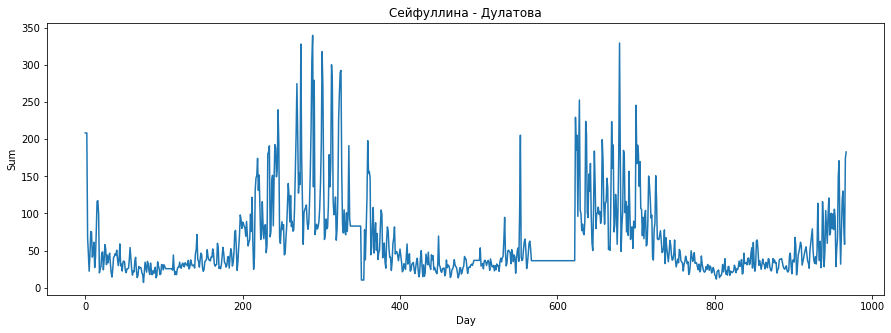

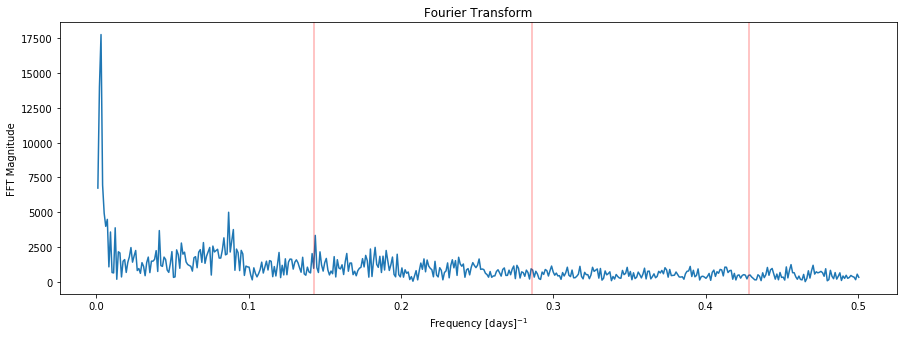

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


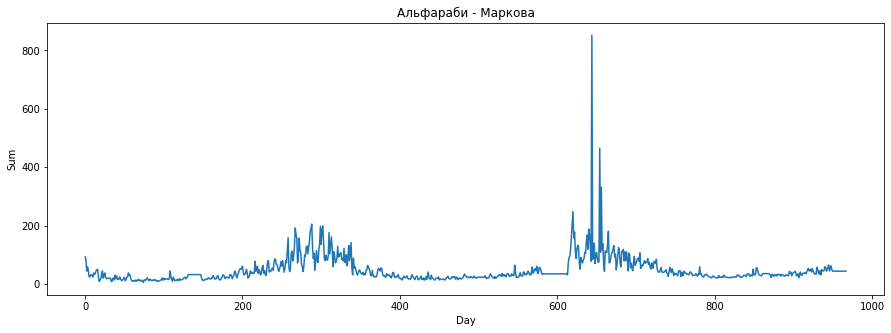

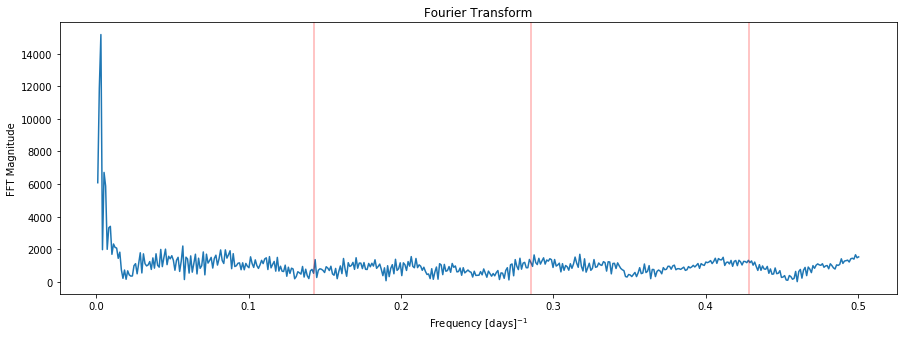

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


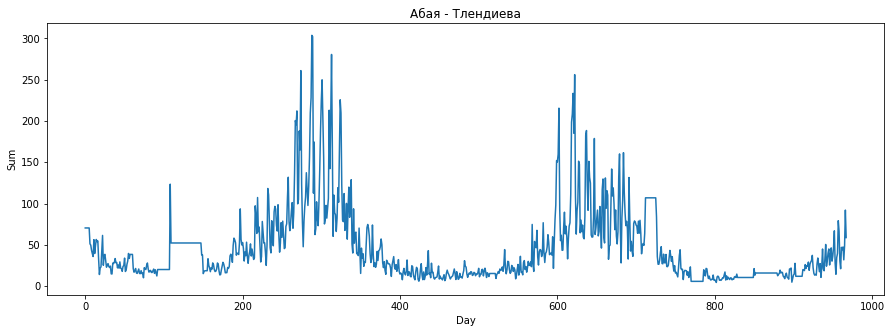

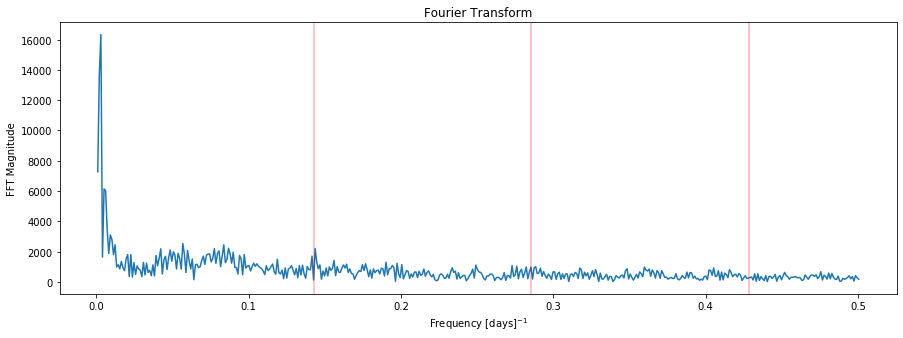

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


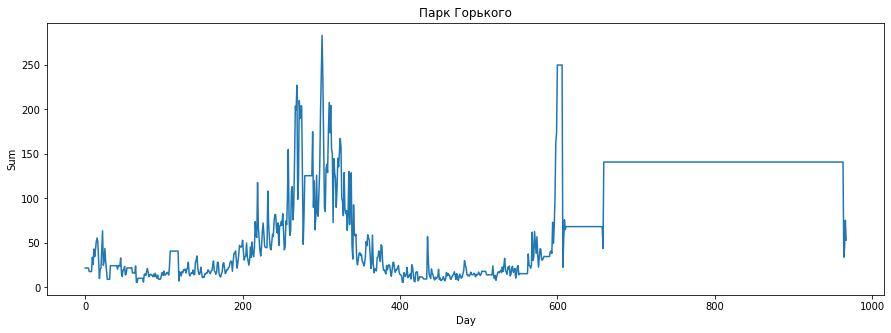

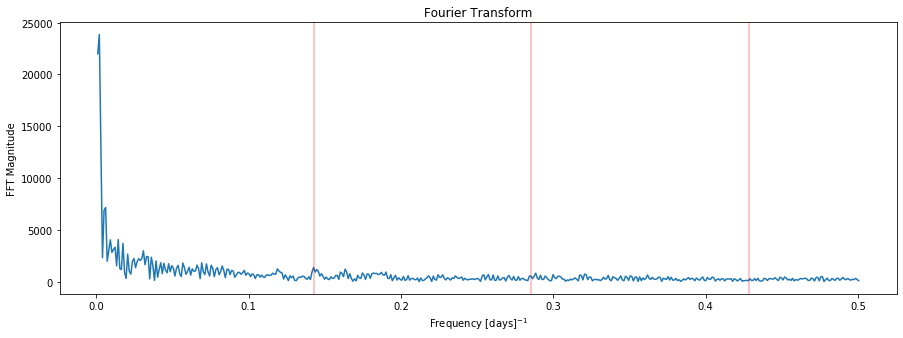

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


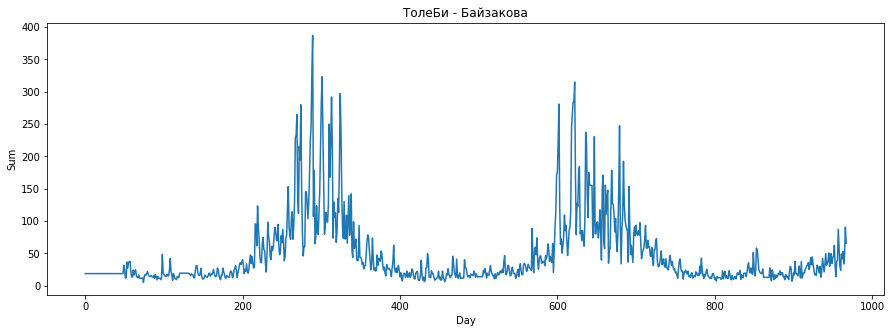

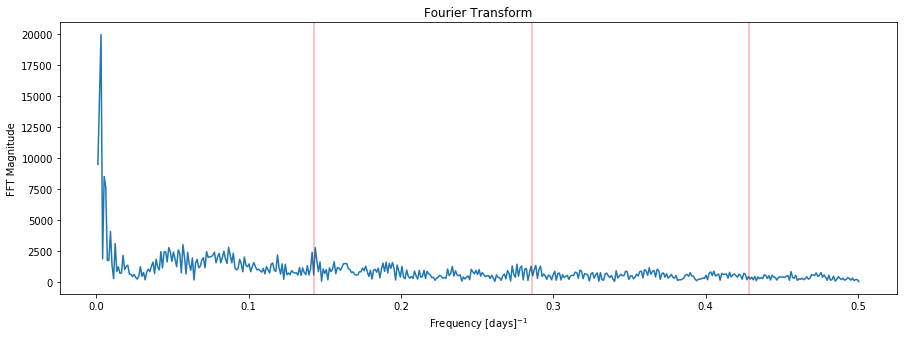

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


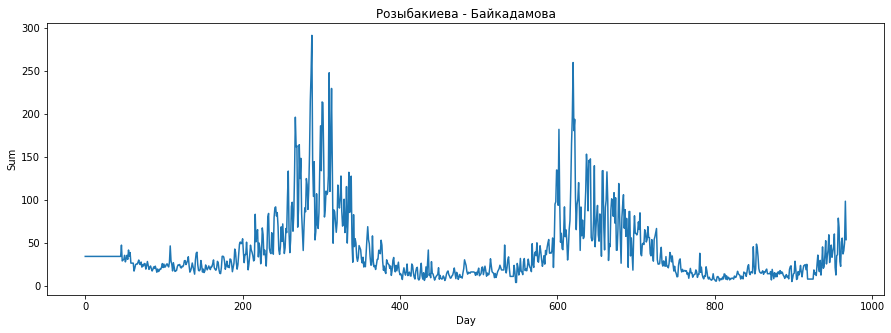

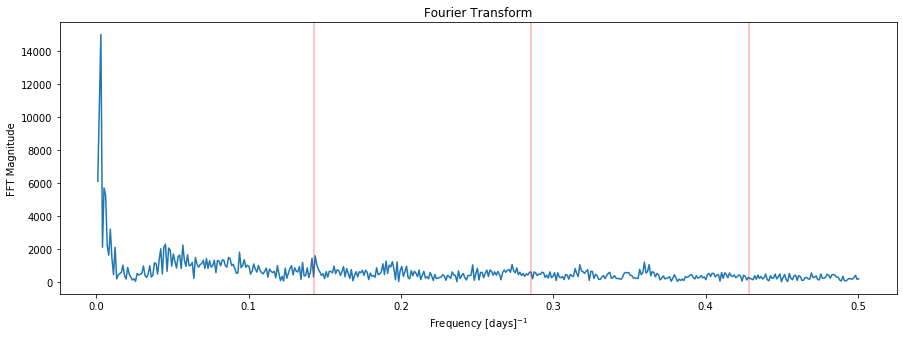

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


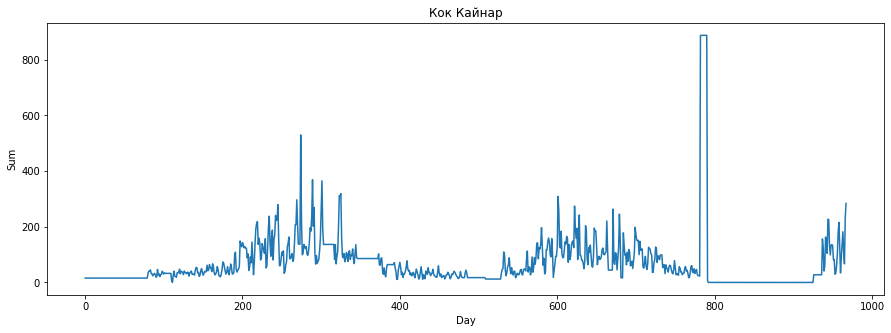

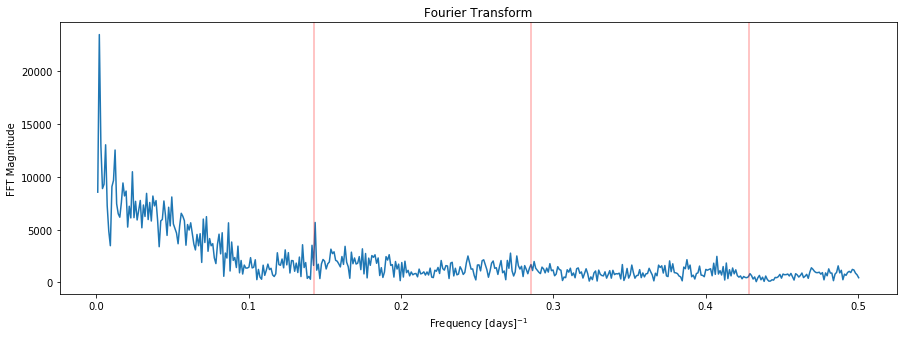

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


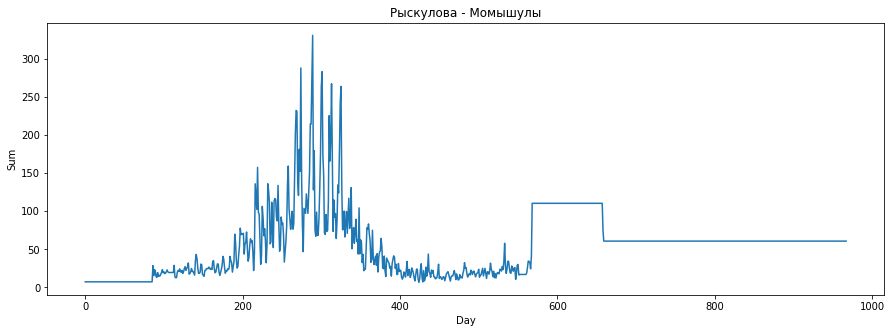

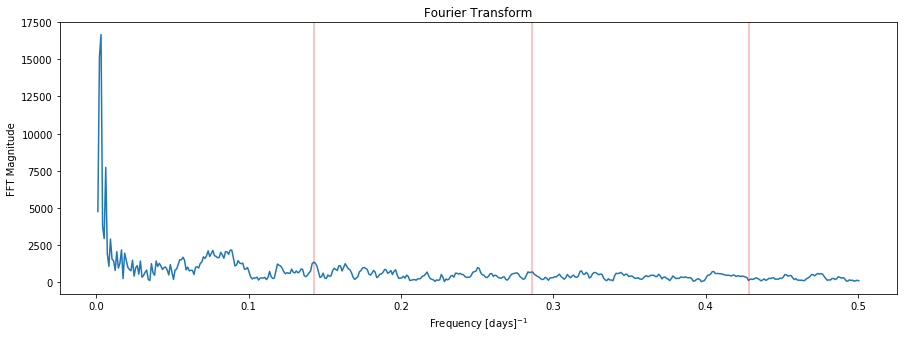

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


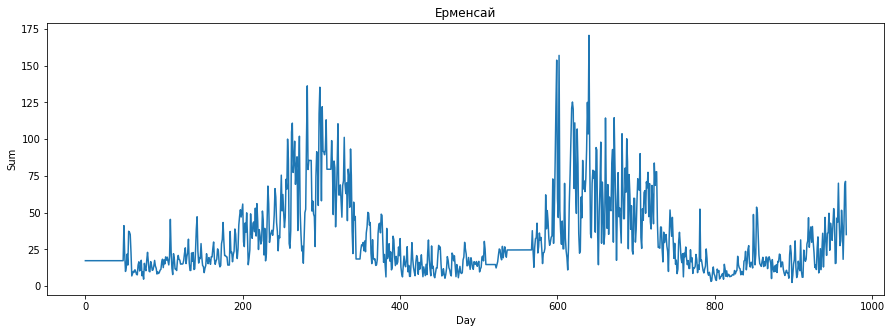

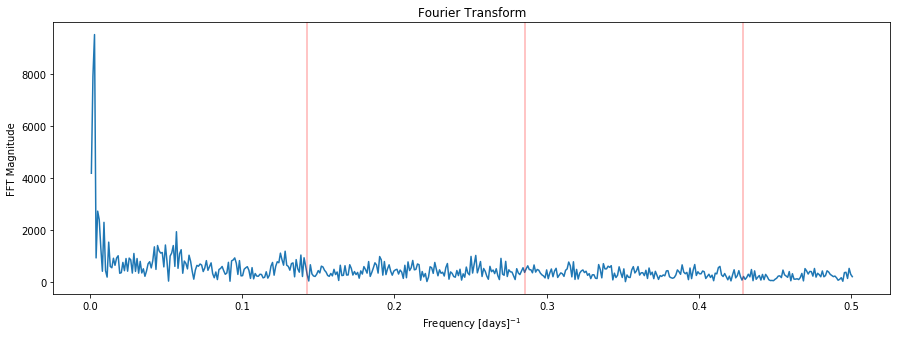

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


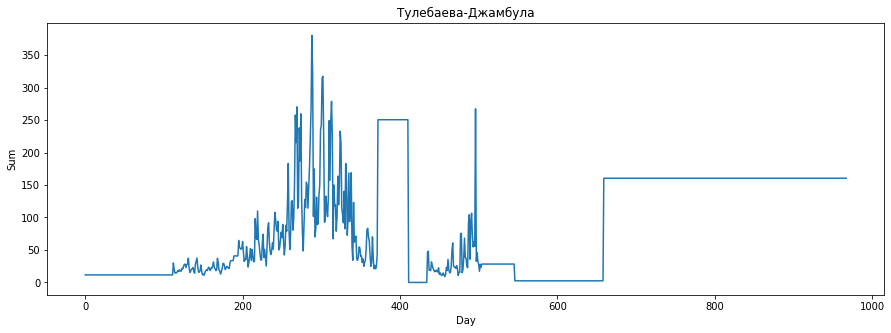

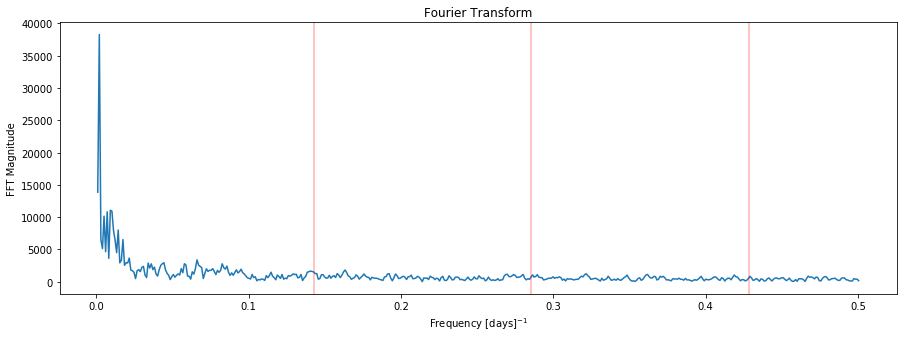

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


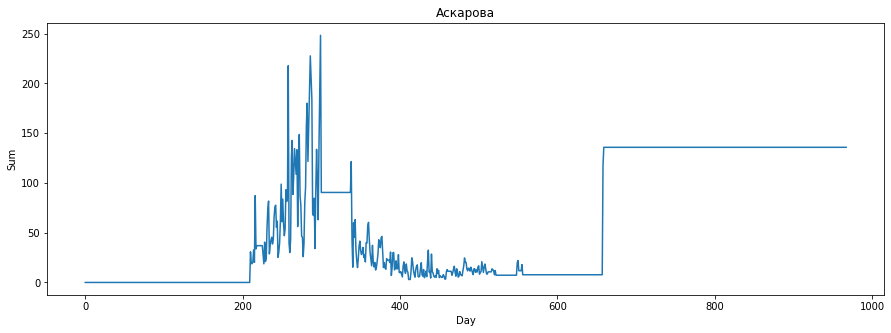

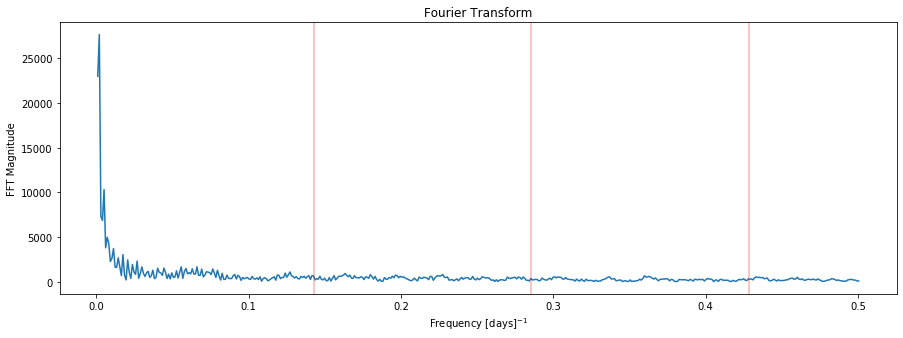

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


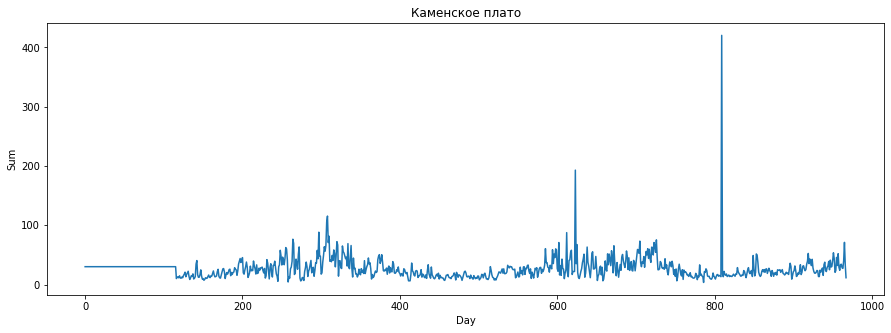

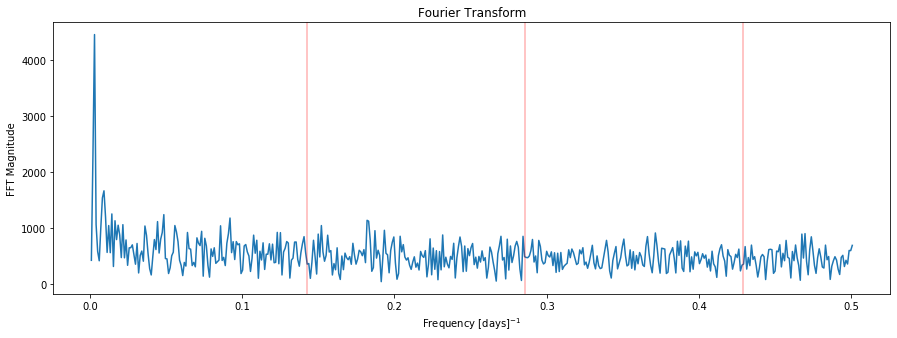

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


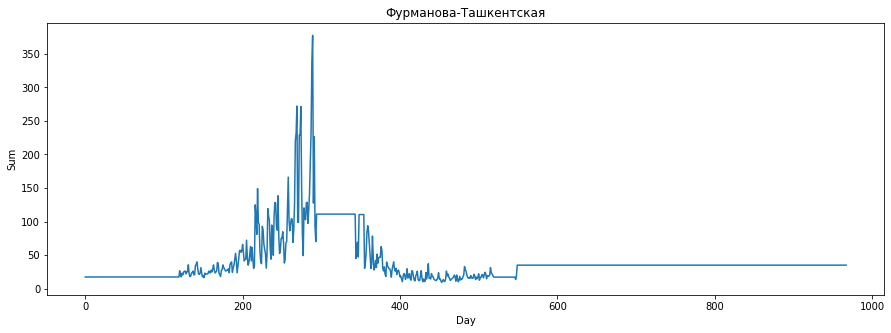

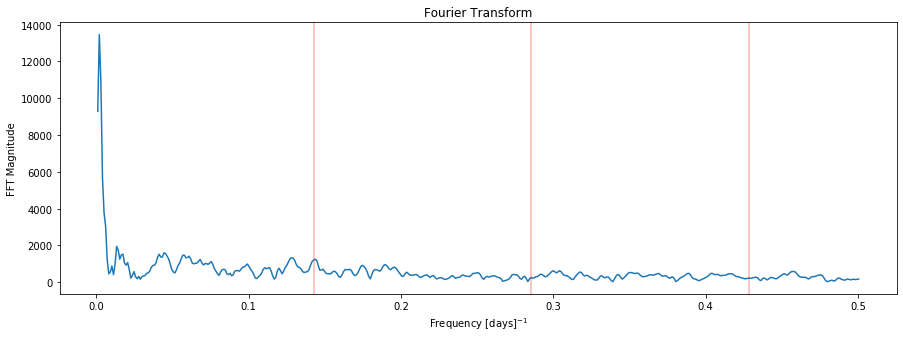

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


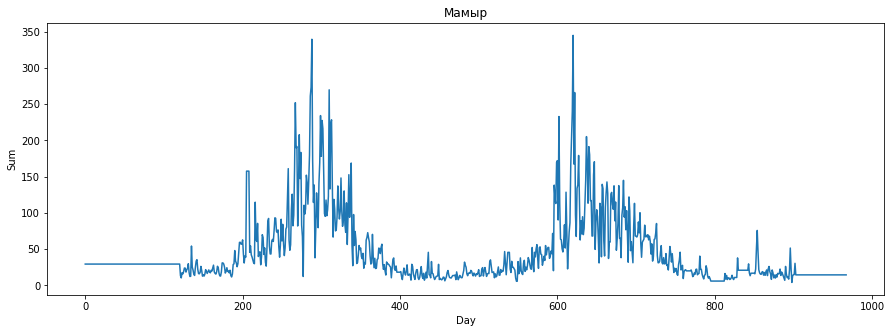

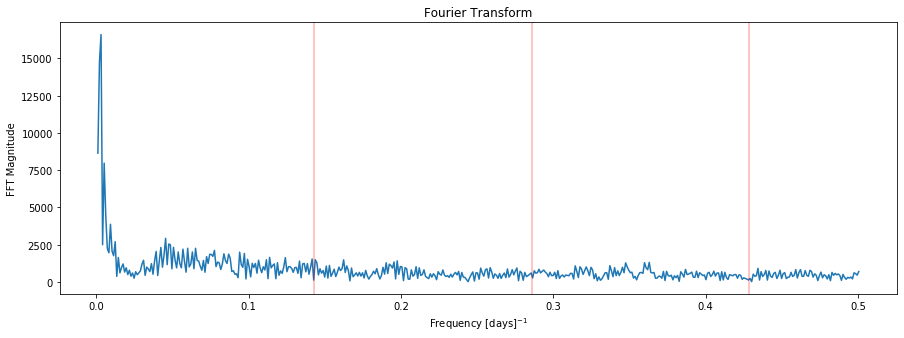

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


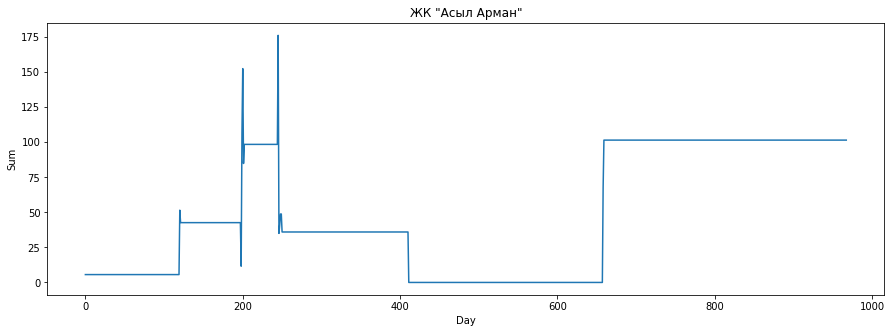

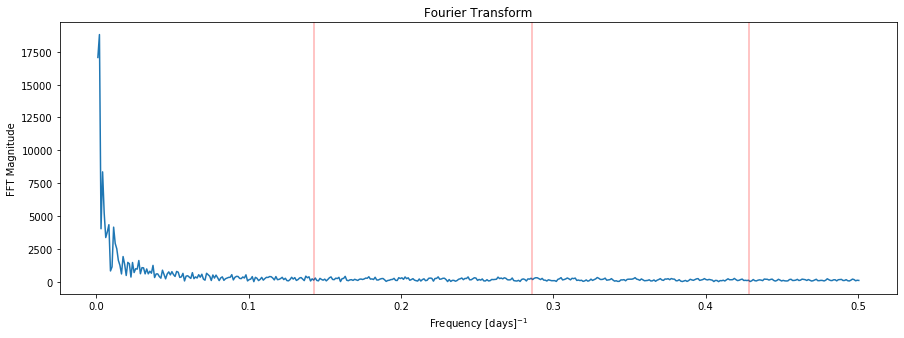

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


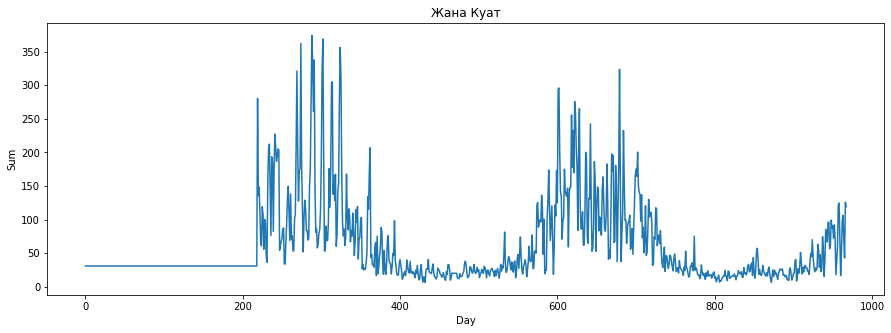

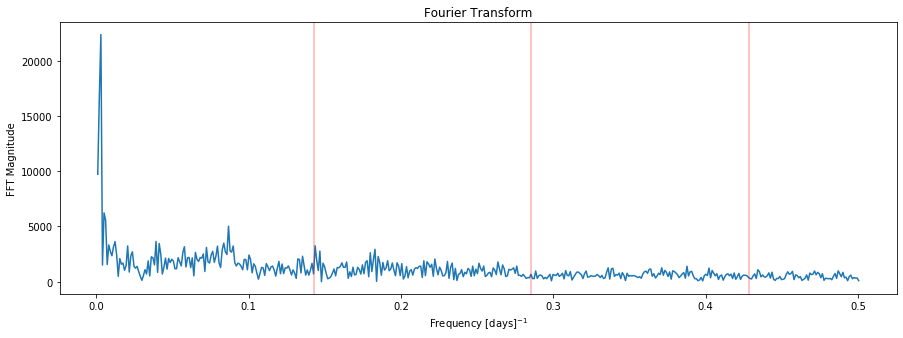

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


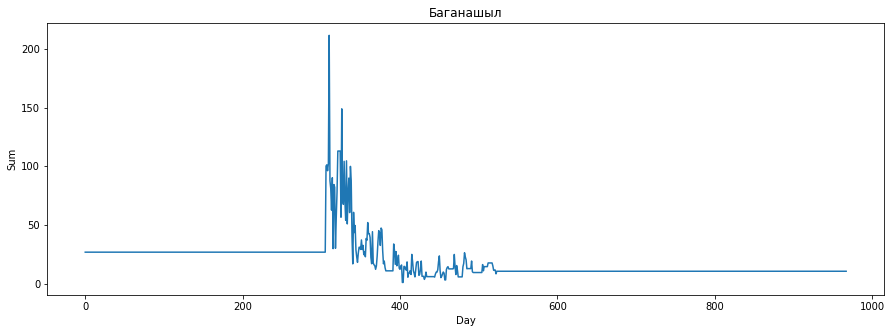

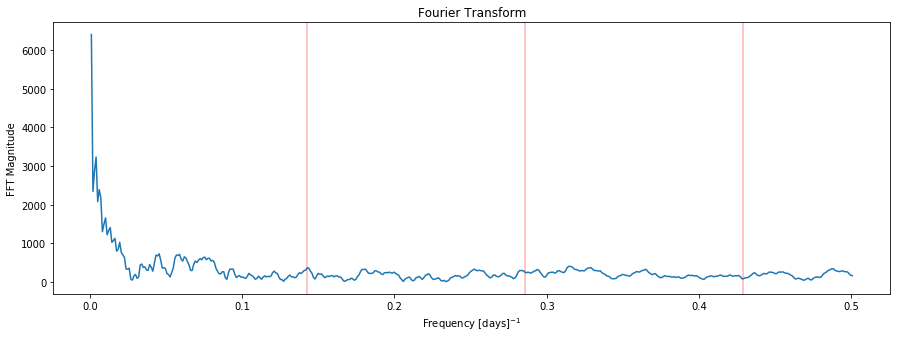

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


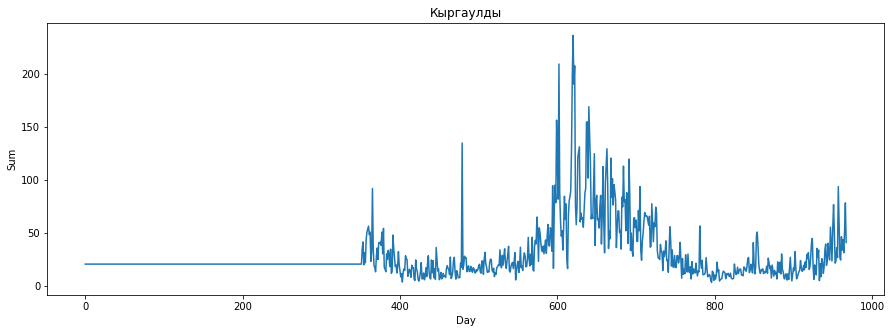

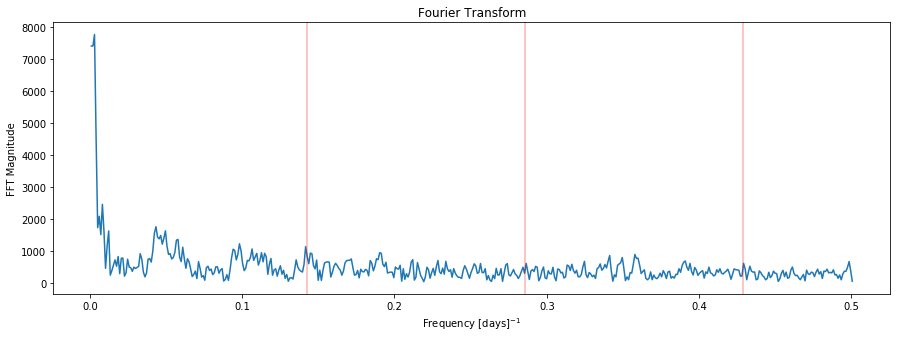

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


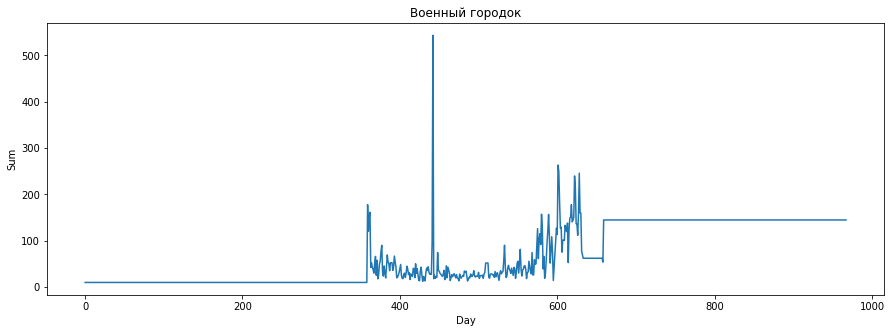

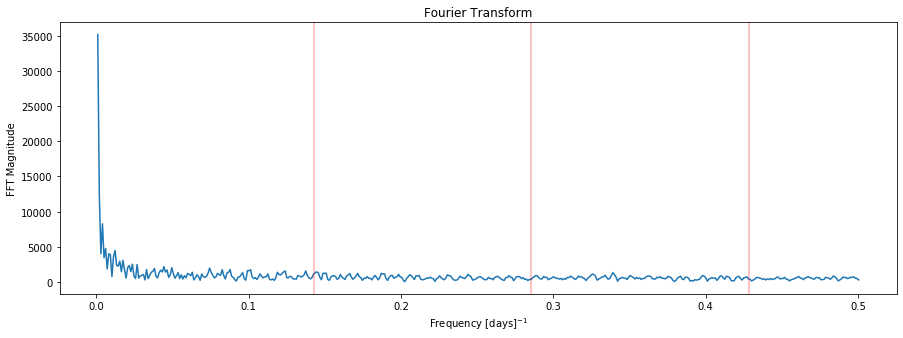

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


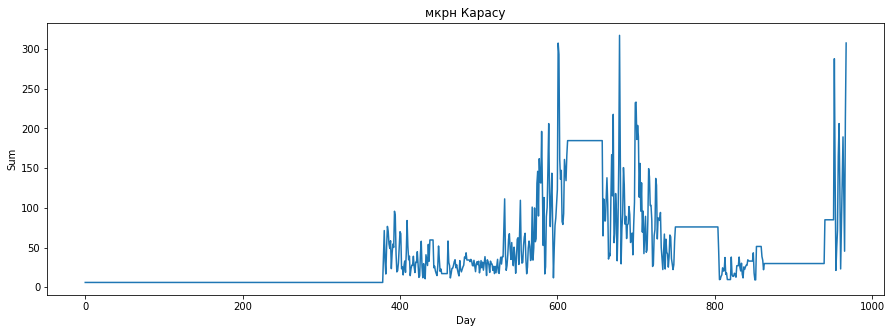

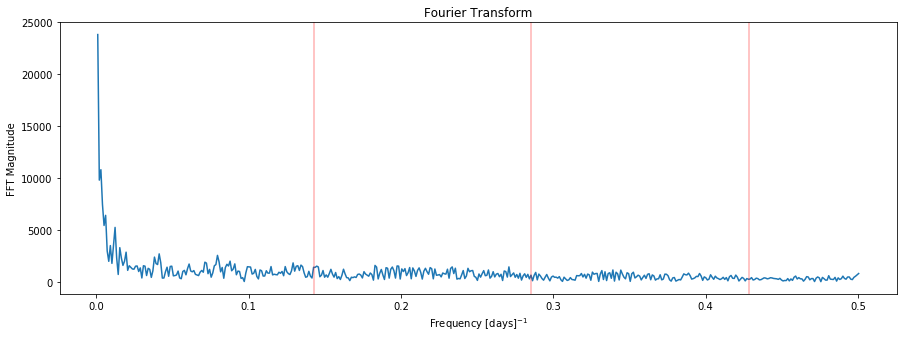

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


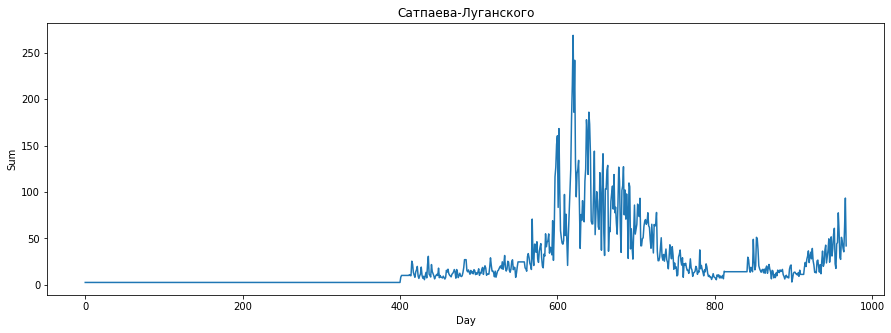

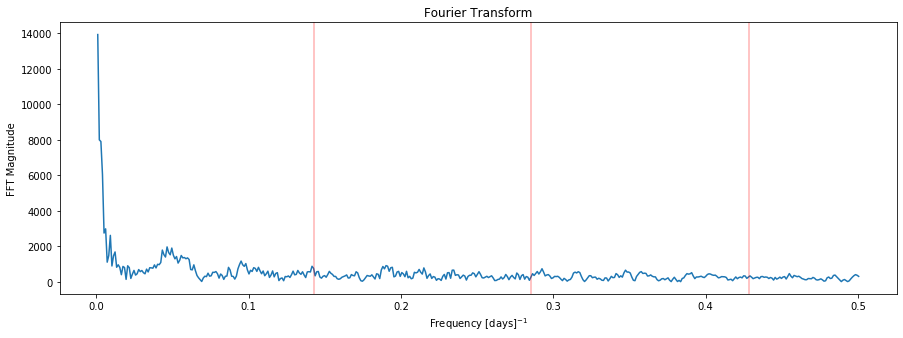

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


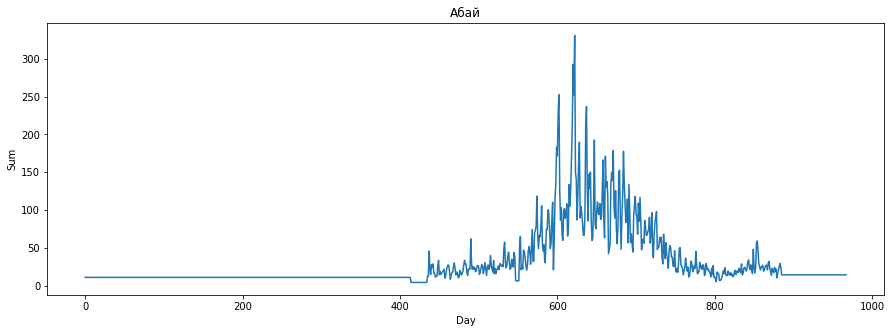

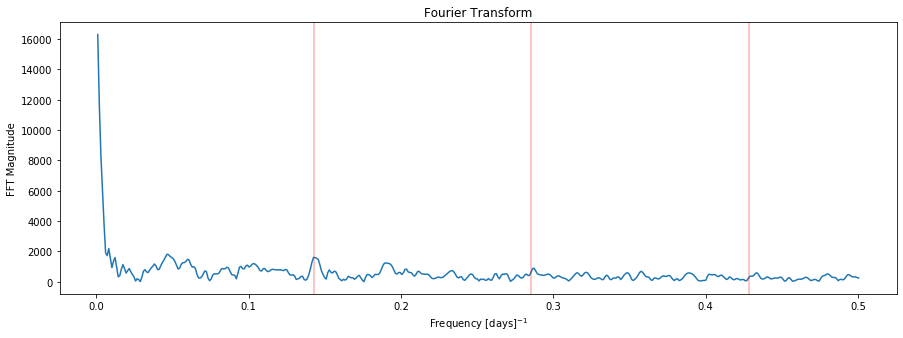

/usr/local/lib/python3.6/dist-packages/scipy/fft/_pocketfft/helper.py:95: FutureWarning: Series.flags is deprecated and will be removed in a future version
  return np.array(x, copy=not x.flags['ALIGNED'])


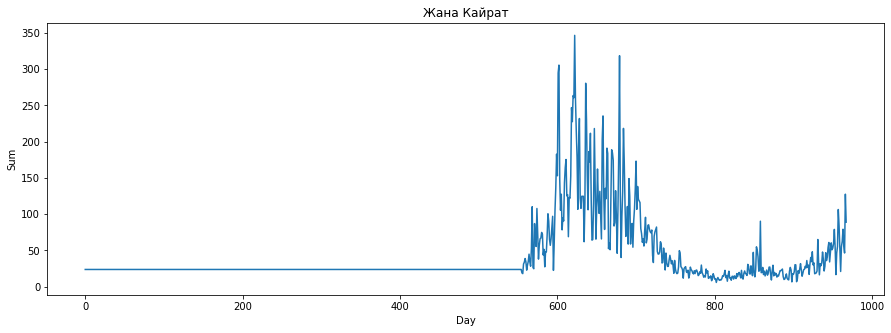

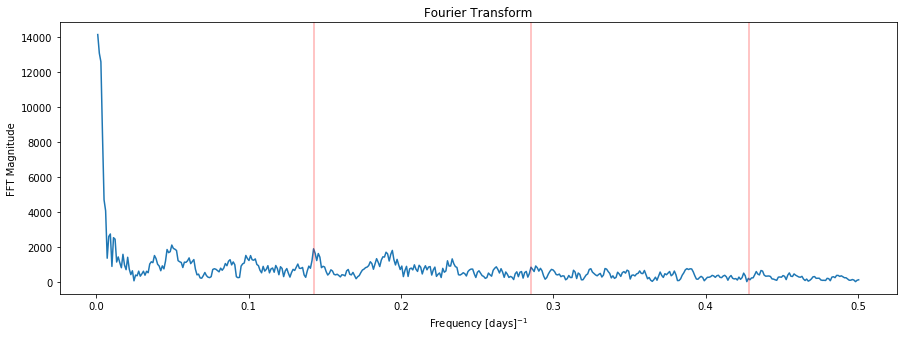

In [0]:
for key in sums:
    plot_with_fft(key)